In [1]:
import numpy as np
import pandas as pd
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

from features.data_provider import get_train_test_wc_dataset, get_feature_columns, get_whole_dataset
from models.grid_search import run_custom_grid_search
from models.helpers import get_best_params, get_feature_importance

In [15]:
X_train, y_train, X_test, y_test, X_wc, y_wc = get_train_test_wc_dataset("home_win")
y_train.loc[y_train != 0] = 1
y_test.loc[y_test != 0] = 1
y_wc.loc[y_wc != 0] = 1

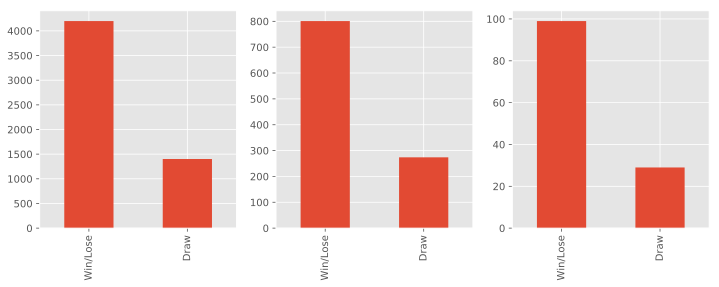

In [16]:
def get_labeled_df(s):
    df = pd.DataFrame(s)
    df[df["home_win"] == 1] = "Win/Lose"
    df[df["home_win"] == 0] = "Draw"
    return df

plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
pd.value_counts(get_labeled_df(y_train)["home_win"]).plot.bar(ax=axes[0])
pd.value_counts(get_labeled_df(y_test)["home_win"]).plot.bar(ax=axes[1])
pd.value_counts(get_labeled_df(y_wc)["home_win"]).plot.bar(ax=axes[2])

In [17]:
params = {"oob_score":True, "bootstrap":True, "n_jobs":-1, "n_estimators": 5000} 
results = run_custom_grid_search(params, X_train, y_train, X_test, y_test, X_wc, y_wc, classifier=True)
get_best_params(results)

Parameter estimation took:  1020.7429320812225


{'max_depth': 3.0, 'max_features': 'sqrt', 'min_samples_leaf': 1}

In [18]:
results

,max_depth,max_features,min_samples_leaf,test_acc,test_mae,test_mse,train_acc,train_mae,train_mse,wc_acc,wc_mae,wc_mse,best_combo
0,3.0,sqrt,1,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
1,3.0,log2,1,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
2,3.0,sqrt,3,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
3,3.0,log2,3,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
4,3.0,sqrt,5,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
5,3.0,log2,5,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
6,3.0,sqrt,10,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
7,3.0,log2,10,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
8,3.0,sqrt,15,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554
9,3.0,log2,15,0.745116,0.254884,0.254884,0.749688,0.250312,0.250312,0.773438,0.226562,0.226562,1.518554


In [19]:
X, y = get_whole_dataset("home_win")
y.loc[y != 0] = 1

In [39]:
params = {
    "oob_score":True,
    "bootstrap":True,
    "n_jobs":-1,
    "n_estimators": 500,
    'max_depth': 3.0,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'class_weight': {0: 3.5}
} 
clf = RandomForestClassifier(**params)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 3.5},
            criterion='gini', max_depth=3.0, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [54]:
probas = clf.predict_proba(X_test)

for row in probas:
    if row[0] > 0.5:
        print(row)

[ 0.57292117  0.42707883]
[ 0.57028358  0.42971642]
[ 0.52328857  0.47671143]
[ 0.57348548  0.42651452]
[ 0.52177248  0.47822752]
[ 0.57337496  0.42662504]
[ 0.57288908  0.42711092]
[ 0.55241755  0.44758245]
[ 0.56800737  0.43199263]
[ 0.57347822  0.42652178]
[ 0.50342285  0.49657715]
[ 0.50344256  0.49655744]
[ 0.54906874  0.45093126]
[ 0.5749022  0.4250978]
[ 0.5712889  0.4287111]
[ 0.54614444  0.45385556]
[ 0.57137777  0.42862223]
[ 0.571533  0.428467]
[ 0.5659184  0.4340816]
[ 0.54058609  0.45941391]
[ 0.5717136  0.4282864]
[ 0.55287509  0.44712491]
[ 0.56603394  0.43396606]
[ 0.51619125  0.48380875]
[ 0.56407043  0.43592957]
[ 0.51194574  0.48805426]
[ 0.56542587  0.43457413]
[ 0.53116939  0.46883061]
[ 0.57035025  0.42964975]
[ 0.55335202  0.44664798]
[ 0.53468652  0.46531348]
[ 0.57283235  0.42716765]
[ 0.53705054  0.46294946]
[ 0.55594418  0.44405582]
[ 0.57283423  0.42716577]
[ 0.53287451  0.46712549]
[ 0.57073924  0.42926076]
[ 0.56722832  0.43277168]
[ 0.56382962  0.43617038

[ 0.51241745  0.48758255]
[ 0.56087601  0.43912399]
[ 0.56457807  0.43542193]
[ 0.57176804  0.42823196]
[ 0.56174455  0.43825545]
[ 0.56118844  0.43881156]
[ 0.57099366  0.42900634]
[ 0.55824486  0.44175514]
[ 0.56313817  0.43686183]
[ 0.55987429  0.44012571]
[ 0.57184081  0.42815919]
[ 0.55341563  0.44658437]
[ 0.56615401  0.43384599]
[ 0.57211719  0.42788281]
[ 0.57347662  0.42652338]
[ 0.57145624  0.42854376]
[ 0.56978084  0.43021916]
[ 0.51911908  0.48088092]
[ 0.57129076  0.42870924]
[ 0.55890092  0.44109908]
[ 0.55218197  0.44781803]
[ 0.54413899  0.45586101]
[ 0.57282407  0.42717593]
[ 0.52206838  0.47793162]
[ 0.57278867  0.42721133]
[ 0.56888954  0.43111046]
[ 0.57146791  0.42853209]
[ 0.57153054  0.42846946]
[ 0.56650284  0.43349716]
[ 0.51256164  0.48743836]
[ 0.53665722  0.46334278]
[ 0.56825448  0.43174552]
[ 0.5716287  0.4283713]
[ 0.5728912  0.4271088]
[ 0.5547123  0.4452877]
[ 0.57267053  0.42732947]
[ 0.56847923  0.43152077]
[ 0.54069155  0.45930845]
[ 0.5743123  0.425